# MTA Playground
Important Note: This will only work with **TIME-CLEANED** version of csv file

In [ ]:
import pandas as pd
from datetime import datetime as dt
print("Hello World!")
print("If you can read this message, the kernel is WORKING.")

### Create Dataframe
Note that "CombinedTurnstile.csv" contains all content of all file, but it may be too large

In [65]:
df = pd.read_csv("cleaned_CombinedTurnstile.csv")
df.columns = df.columns.str.strip()
df["DATE"] = pd.to_datetime(df["DATE"], format='%m/%d/%Y')
df["TIME"] = pd.to_datetime(df["TIME"], format="%m/%d/%Y %H:%M:%S")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-06-24,2017-06-24 00:00:00,REGULAR,6233682,2110437
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-06-24,2017-06-24 04:00:00,REGULAR,6233696,2110445
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-06-24,2017-06-24 08:00:00,REGULAR,6233712,2110473
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-06-24,2017-06-24 12:00:00,REGULAR,6233790,2110560
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-06-24,2017-06-24 16:00:00,REGULAR,6233942,2110622


In [66]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
589666,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2017-07-14,2017-07-14 05:00:00,REGULAR,5554,306
589667,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2017-07-14,2017-07-14 09:00:00,REGULAR,5554,306
589668,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2017-07-14,2017-07-14 13:00:00,REGULAR,5554,306
589669,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2017-07-14,2017-07-14 17:00:00,REGULAR,5554,306
589670,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2017-07-14,2017-07-14 21:00:00,REGULAR,5554,306


#### (Debugging Purpose) Dataframe Information

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589671 entries, 0 to 589670
Data columns (total 11 columns):
C/A         589671 non-null object
UNIT        589671 non-null object
SCP         589671 non-null object
STATION     589671 non-null object
LINENAME    589671 non-null object
DIVISION    589671 non-null object
DATE        589671 non-null datetime64[ns]
TIME        589671 non-null datetime64[ns]
DESC        589671 non-null object
ENTRIES     589671 non-null int64
EXITS       589671 non-null int64
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 49.5+ MB


#### (Debugging Purpose) Show the list of all station

In [5]:
#print(set(df["STATION"]))
print(len(set(df["STATION"])))
#We have 376 Stations

376


### C/A, Unit, SCP, Day Separation
Note that it take some amount of time to run (on my machine)

In [68]:
dic1 = {}
for i,row in df.iterrows():
    t1 = (row["C/A"],row["UNIT"],row["SCP"],row["STATION"],row["DATE"])
    t2 = (row["TIME"],row["ENTRIES"])
    if t1 in dic1:
        dic1[t1].append(t2)
    else:
        dic1[t1] = [t2]
print("Done!")
#print(dic1)


Done!


In [69]:
#Test Function
want = dt(2017,6,24)
print(dic1[('A002', 'R051', '02-00-00', '59 ST', want)])

[(Timestamp('2017-06-24 00:00:00'), 6233682), (Timestamp('2017-06-24 04:00:00'), 6233696), (Timestamp('2017-06-24 08:00:00'), 6233712), (Timestamp('2017-06-24 12:00:00'), 6233790), (Timestamp('2017-06-24 16:00:00'), 6233942), (Timestamp('2017-06-24 20:00:00'), 6234222)]


### All Day Count
You may run this **twice** to remove all negative value

In [13]:
allDayDict = {}
cnt = 0
ercnt = 0
toDel = []
for k,v in dic1.items():
    v.sort()
    cnt +=1
    t1 = (k[0],k[1],k[3],k[4])
    t2 = (v[-1][1]-v[0][1])
    allDayDict[t1] = allDayDict.get(t1,0)+t2
    if(t2<0):
        #print("Error",t1,v[0],v[-1],t2)
        ercnt +=1
        toDel.append(k)
print("Bug Count:",ercnt,"/",cnt)

for k in toDel:
    del dic1[k]
    
allDayDict = {}
cnt = 0
ercnt = 0
toDel = []
for k,v in dic1.items():
    v.sort()
    cnt +=1
    t1 = (k[0],k[1],k[3],k[4])
    t2 = (v[-1][1]-v[0][1])
    allDayDict[t1] = allDayDict.get(t1,0)+t2
    if(t2<0):
        print("Error",t1,v[0],v[-1],t2)
        ercnt +=1
        toDel.append(k)
print("Bug Count:",ercnt,"/",cnt)
    
print(allDayDict.items())

Bug Count: 291 / 32858
Bug Count: 0 / 32567
dict_items([(('A002', 'R051', '59 ST', Timestamp('2017-06-24 00:00:00')), 6686), (('A002', 'R051', '59 ST', Timestamp('2017-06-25 00:00:00')), 5579), (('A002', 'R051', '59 ST', Timestamp('2017-06-26 00:00:00')), 11464), (('A002', 'R051', '59 ST', Timestamp('2017-06-27 00:00:00')), 12335), (('A002', 'R051', '59 ST', Timestamp('2017-06-28 00:00:00')), 12432), (('A002', 'R051', '59 ST', Timestamp('2017-06-29 00:00:00')), 12275), (('A002', 'R051', '59 ST', Timestamp('2017-06-30 00:00:00')), 11453), (('A006', 'R079', '5 AV/59 ST', Timestamp('2017-06-24 00:00:00')), 5922), (('A006', 'R079', '5 AV/59 ST', Timestamp('2017-06-25 00:00:00')), 5298), (('A006', 'R079', '5 AV/59 ST', Timestamp('2017-06-26 00:00:00')), 11686), (('A006', 'R079', '5 AV/59 ST', Timestamp('2017-06-27 00:00:00')), 12393), (('A006', 'R079', '5 AV/59 ST', Timestamp('2017-06-28 00:00:00')), 12495), (('A006', 'R079', '5 AV/59 ST', Timestamp('2017-06-29 00:00:00')), 12076), (('A006'

### Overall Count

In [14]:
everydayDict = {}
for k,v in allDayDict.items():
    t1 = (k[0],k[1],k[2])
    t2 = v
    everydayDict[t1] = everydayDict.get(t1,0)+t2
highscoreList = []
for k,v in everydayDict.items():
    highscoreList.append((v,k))
highscoreList.sort(reverse = True)
#print(highscoreList)
show = 20
print("Top",show,"Stations")
for i in range(show):
    if(i>=len(highscoreList)):
        break
    print(highscoreList[i][0],highscoreList[i][1])

Top 20 Stations
1610359535 ('R204', 'R043', 'WALL ST')
200138084 ('R326', 'R389', 'BRONX PARK EAST')
96927965 ('N400A', 'R359', 'COURT SQ')
307115 ('PTH22', 'R540', 'PATH NEW WTC')
295143 ('R238', 'R046', 'GRD CNTRL-42 ST')
259941 ('R138', 'R293', '34 ST-PENN STA')
237677 ('R533', 'R055', 'FLUSHING-MAIN')
223597 ('N324', 'R018', 'JKSN HT-ROOSVLT')
206646 ('R240', 'R047', 'GRD CNTRL-42 ST')
182312 ('N051', 'R084', '59 ST COLUMBUS')
179283 ('R221', 'R170', '14 ST-UNION SQ')
177666 ('R250', 'R179', '86 ST')
167863 ('N506', 'R022', '34 ST-HERALD SQ')
165458 ('H009', 'R235', 'BEDFORD AV')
155874 ('PTH03', 'R552', 'JOURNAL SQUARE')
154811 ('N606', 'R025', 'JAMAICA CENTER')
151913 ('H001', 'R175', '8 AV')
142291 ('N083', 'R138', 'W 4 ST-WASH SQ')
141091 ('R169', 'R168', '96 ST')
139237 ('PTH17', 'R541', 'THIRTY THIRD ST')


### Visualization: Number of Riders
Not useful as the number of riders in "best" station is significantly larger

732


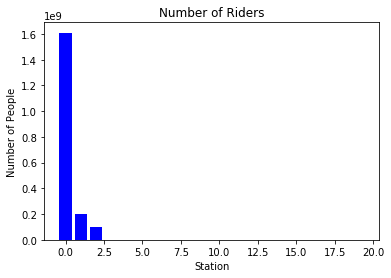

In [15]:
import matplotlib.pyplot as plt
l = len(highscoreList)
print(l)
x = range(20)
y = [highscoreList[i][0] for i in range(20)]
plt.bar(x,y,color = "b")
plt.title("Number of Riders")
plt.ylabel("Number of People")
plt.xlabel("Station")
plt.show()

## Preparation for Future Play
In this section, I will store all data by (C/A,UNIT,STATION) then by SCP then by date and time. The purpose of this section is to prepare data for later uses.

In [92]:
bigDict = {}
for i,row in df.iterrows():
    t1 = (row["C/A"],row["UNIT"],row["STATION"])
    t2 = row["SCP"]
    t3 = (row["TIME"],row["EXITS"])
    if t1 not in bigDict:
        bigDict[t1] = {}
    if t2 not in bigDict[t1]:
        bigDict[t1][t2] = []
    bigDict[t1][t2].append(t3)
print("Done!")

Done!


## Data Cleanup
Due to a bug in MTA data, this section is used to remove "incorrect" data

#### My Decision Note
Lots of stations has "Reverse-order" log, but has "Monotonic" property. I decide to keep that "Incorrect" data into consideration by using absolute value instead.

In [93]:
print(len(bigDict))
trouble = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]):
                continue
            if(lst[i-1][1]>=lst[i][1] and lst[i][1]>=lst[i+1][1]):
                continue
            #print("Problem Detected: ",st,scp)
            #print(lst[i-1],lst[i],lst[i+1])
            key = (st,scp)
            trouble[key] = trouble.get(key,0)+1
print("Trouble List: ")
for k,v in trouble.items():
    print(k,v)

732
Trouble List: 
(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00') 2
(('A043', 'R462', 'CANAL ST'), '00-06-00') 2
(('A050', 'R088', 'CORTLANDT ST'), '00-03-00') 2
(('E001', 'R368', '9 AV'), '00-00-04') 2
(('H023', 'R236', 'DEKALB AV'), '00-00-02') 2
(('JFK01', 'R535', 'HOWARD BCH JFK'), '00-00-02') 1
(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00') 2
(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-03') 2
(('N043', 'R186', '86 ST'), '00-00-00') 2
(('N063', 'R011', '42 ST-PORT AUTH'), '02-00-04') 2
(('N095A', 'R014', 'FULTON ST'), '01-00-03') 2
(('N103', 'R127', 'JAY ST-METROTEC'), '00-00-03') 2
(('N112A', 'R284', 'CLINTON-WASH AV'), '01-06-00') 2
(('N206', 'R104', '167 ST'), '01-06-00') 2
(('N305A', 'R016', 'LEXINGTON AV/53'), '00-03-04') 2
(('N338', 'R128', 'SUTPHIN BLVD'), '01-06-00') 2
(('N400A', 'R359', 'COURT SQ'), '02-06-02') 1
(('N400A', 'R359', 'COURT SQ'), '02-06-04') 1
(('N506', 'R022', '34 ST-HERALD SQ'), '00-03-02') 2
(('N525', 'R142', 'DELANCEY/ESSEX'), '01-00-02') 2
(('N5

#### Printing Function
This function take input in form of (C/A,UNIT,STATION). It will print all information for that station

In [45]:
#Debugging Purpose
def StationTest(stationInfo):
    print("***********")
    print("Summary for",stationInfo)
    for k1,v1 in bigDict[stationInfo].items():
        print(" SCP:",k1)
        v1.sort()
        for v2 in v1:
            print(" ",v2)
        print(" -------")
    print("***********")

StationTest(('R204', 'R043', 'WALL ST'))

***********
Summary for ('R204', 'R043', 'WALL ST')
 SCP: 02-00-00
  (Timestamp('2017-06-24 02:00:00'), 1797355)
  (Timestamp('2017-06-24 06:00:00'), 1797376)
  (Timestamp('2017-06-24 10:00:00'), 1797412)
  (Timestamp('2017-06-24 14:00:00'), 1797560)
  (Timestamp('2017-06-24 18:00:00'), 1797844)
  (Timestamp('2017-06-24 22:00:00'), 1798066)
  (Timestamp('2017-06-25 02:00:00'), 1798183)
  (Timestamp('2017-06-25 06:00:00'), 1798208)
  (Timestamp('2017-06-25 10:00:00'), 1798266)
  (Timestamp('2017-06-25 14:00:00'), 1798385)
  (Timestamp('2017-06-25 18:00:00'), 1798591)
  (Timestamp('2017-06-25 22:00:00'), 1798820)
  (Timestamp('2017-06-26 02:00:00'), 1798918)
  (Timestamp('2017-06-26 06:00:00'), 1798925)
  (Timestamp('2017-06-26 10:00:00'), 1798958)
  (Timestamp('2017-06-26 14:00:00'), 1799018)
  (Timestamp('2017-06-26 18:00:00'), 1799278)
  (Timestamp('2017-06-26 22:00:00'), 1799525)
  (Timestamp('2017-06-27 02:00:00'), 1799568)
  (Timestamp('2017-06-27 06:00:00'), 1799575)
  (Timestamp(

In [20]:
#More Debugging Stuff
#print(bigDict[('R204', 'R043', 'WALL ST')])

###### Note
I found a bug for ('R204', 'R043', 'WALL ST') SCP: 02-03-02 Time: 2017-06-24 22:00:00 (The value is too large)

In [60]:
#Problem Detected
StationTest(('PTH11', 'R545', '14TH STREET'))

***********
Summary for ('PTH11', 'R545', '14TH STREET')
 SCP: 00-00-00
  (Timestamp('2017-06-24 02:21:02'), 76100)
  (Timestamp('2017-06-24 06:33:02'), 76100)
  (Timestamp('2017-06-24 10:45:02'), 76127)
  (Timestamp('2017-06-24 14:57:02'), 76249)
  (Timestamp('2017-06-24 19:09:02'), 76447)
  (Timestamp('2017-06-24 23:21:02'), 76605)
  (Timestamp('2017-06-25 03:33:02'), 76682)
  (Timestamp('2017-06-25 07:45:02'), 76691)
  (Timestamp('2017-06-25 11:57:02'), 76723)
  (Timestamp('2017-06-25 16:09:02'), 76891)
  (Timestamp('2017-06-25 20:21:02'), 77403)
  (Timestamp('2017-06-26 00:33:02'), 77643)
  (Timestamp('2017-06-26 04:45:02'), 77654)
  (Timestamp('2017-06-26 08:57:02'), 77748)
  (Timestamp('2017-06-26 13:09:02'), 77812)
  (Timestamp('2017-06-26 17:21:02'), 78008)
  (Timestamp('2017-06-26 21:33:02'), 78528)
  (Timestamp('2017-06-27 01:45:02'), 78590)
  (Timestamp('2017-06-27 05:57:02'), 78593)
  (Timestamp('2017-06-27 10:09:02'), 78722)
  (Timestamp('2017-06-27 14:21:02'), 78768)
  (T

In [81]:
import matplotlib.pyplot as plt
def inspection(stationInfo,scp):
    t = []
    r = []
    for v in bigDict[stationInfo][scp]:
        t.append(v[0])
        r.append(v[1])
    plt.plot(t,r,".r")
    plt.title(str(stationInfo)+" "+scp)
    plt.xlabel("Time")
    plt.ylabel("Data")
    plt.show()
    
def inspection2(tup):
    inspection(tup[0],tup[1])
    
#inspection(('PTH11', 'R545', '14TH STREET'),'00-00-03')
#inspection(('R204', 'R043', 'WALL ST'),"02-03-02")
#inspection2((('A037', 'R170', '14 ST-UNION SQ'), '05-00-00'))
#inspection2((('R416', 'R245', 'ST LAWRENCE AV'), '00-00-00'))

All Trouble
Total Trouble: 82


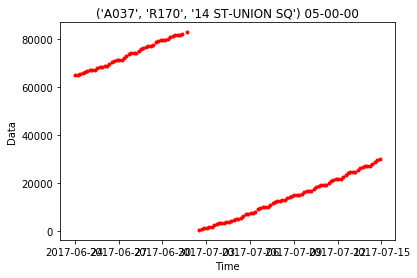

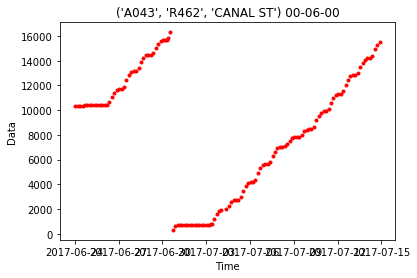

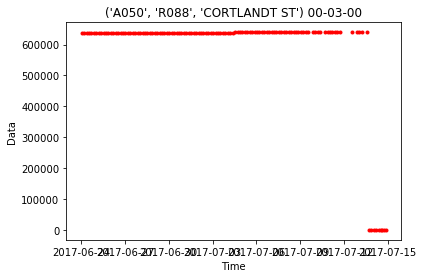

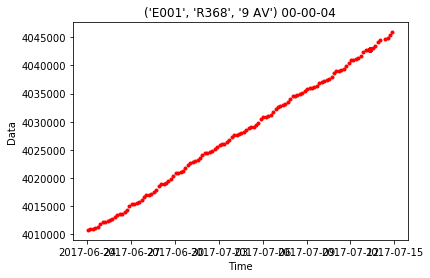

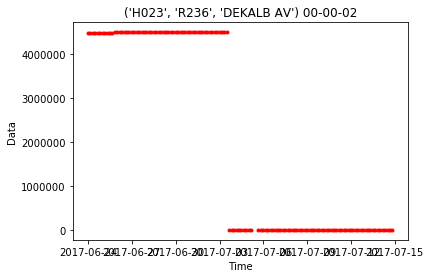

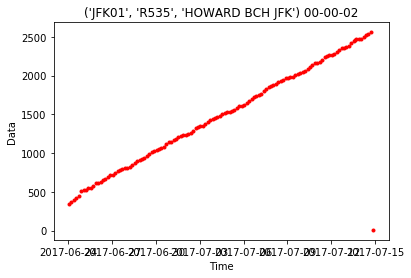

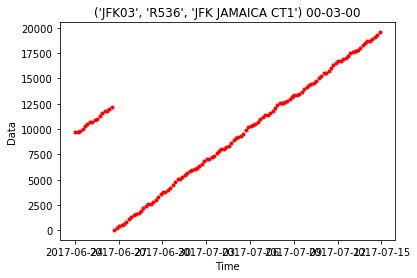

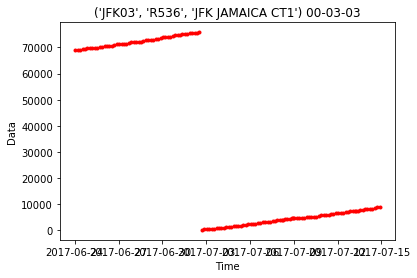

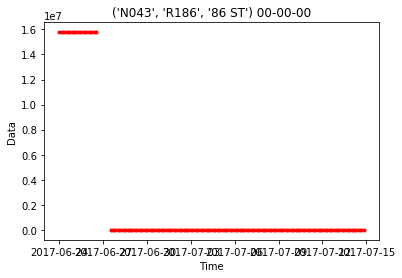

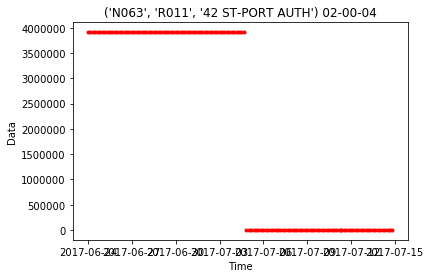

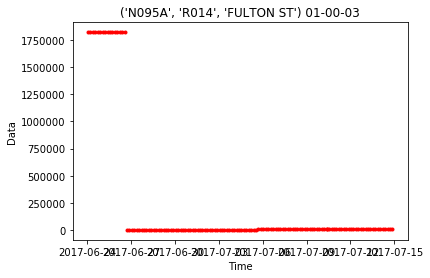

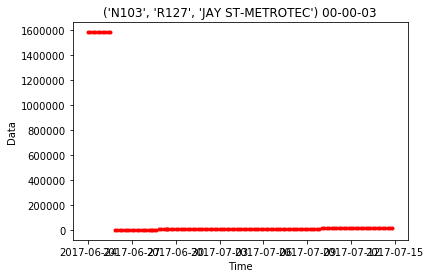

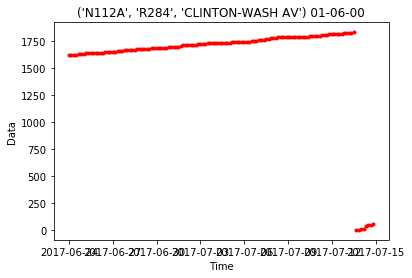

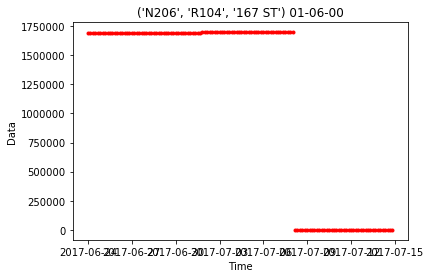

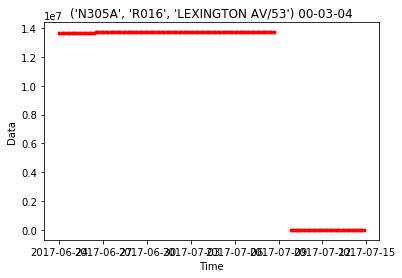

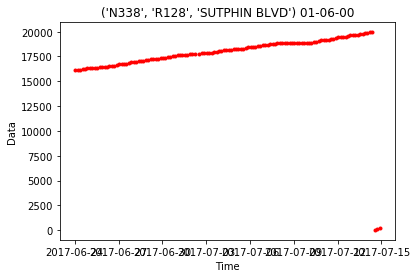

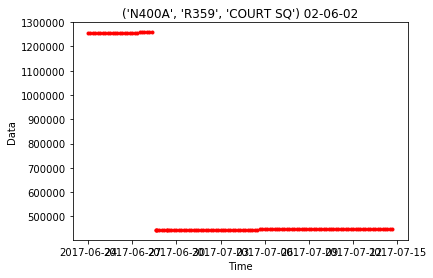

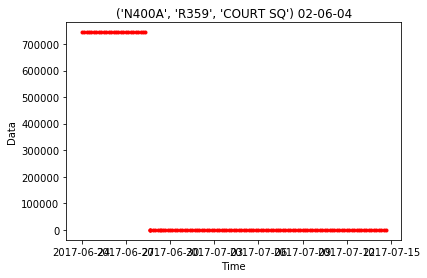

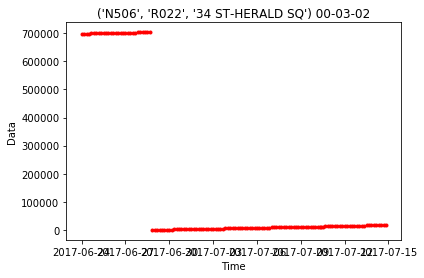

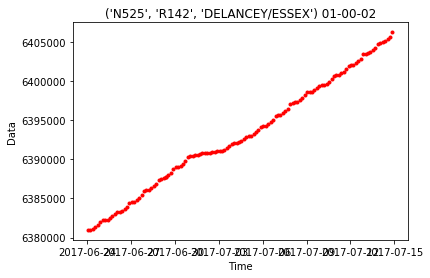

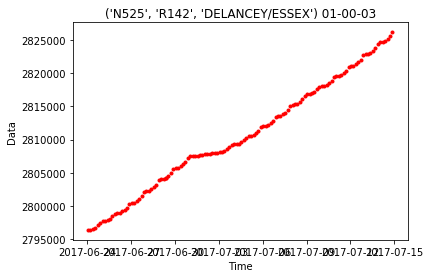

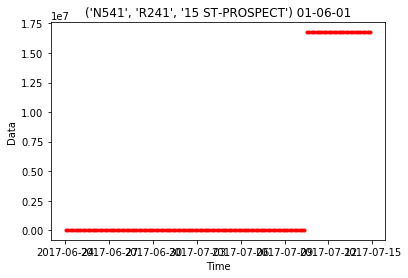

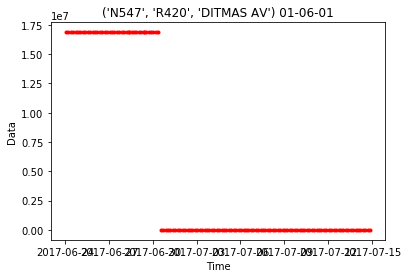

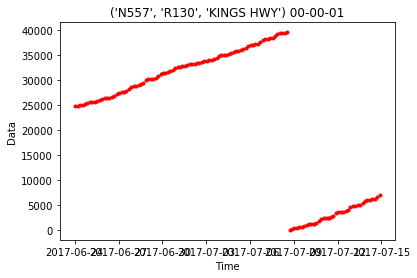

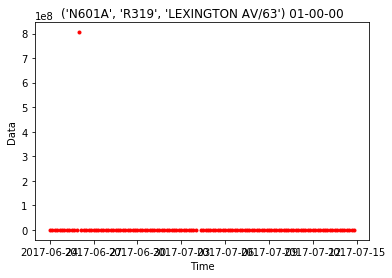

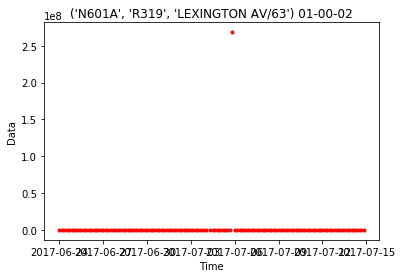

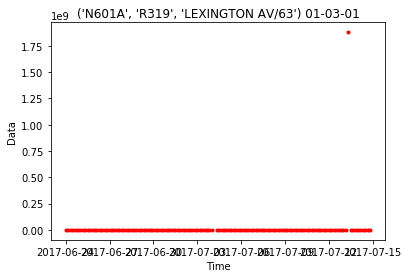

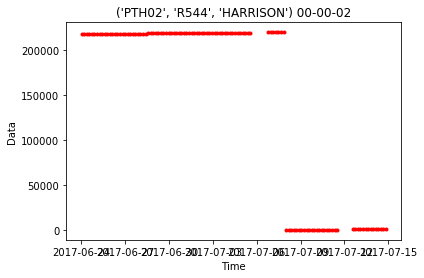

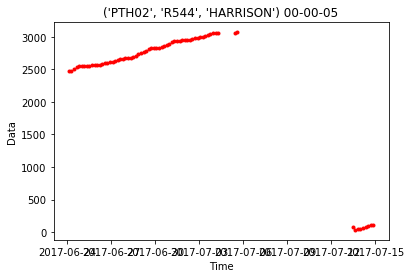

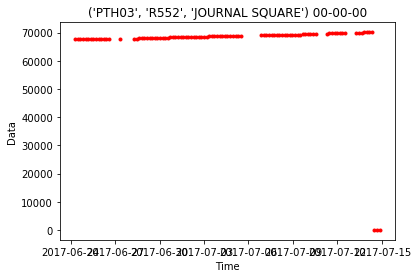

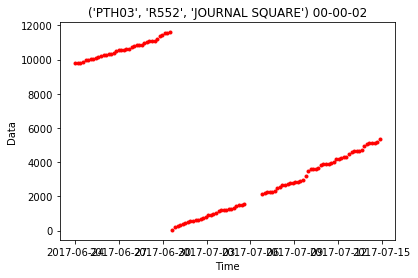

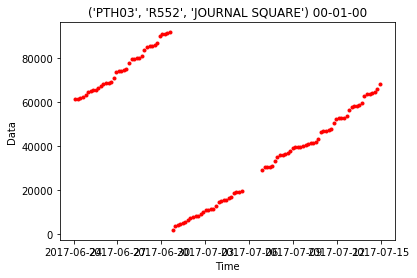

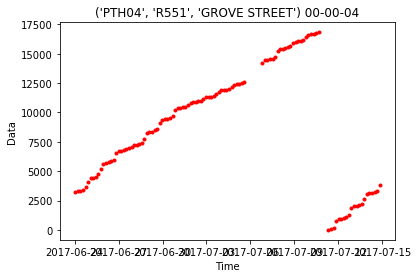

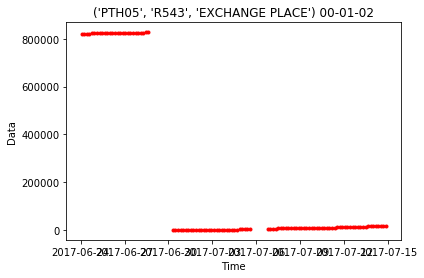

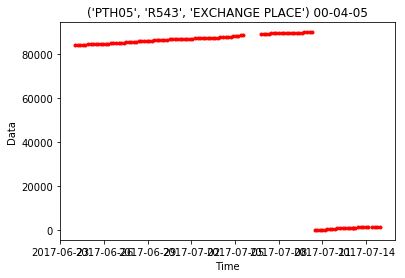

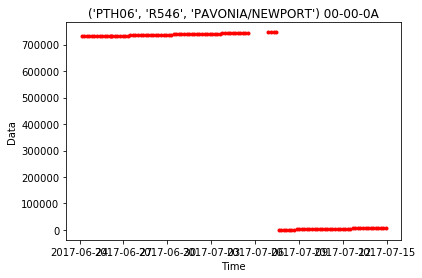

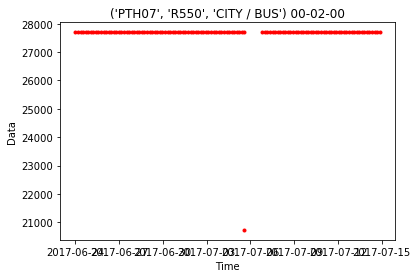

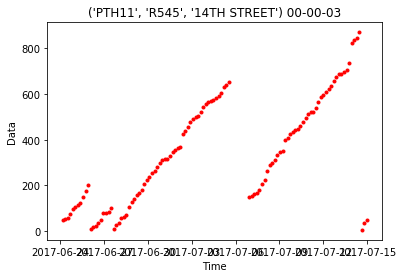

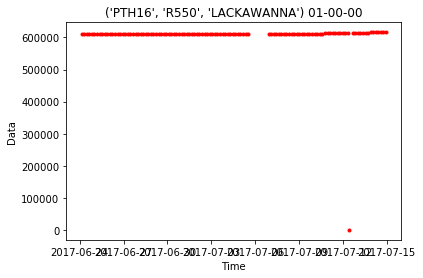

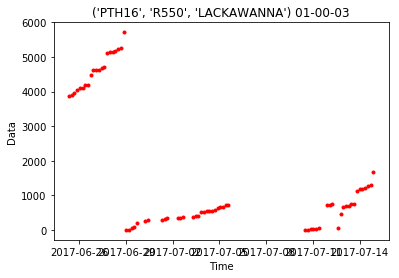

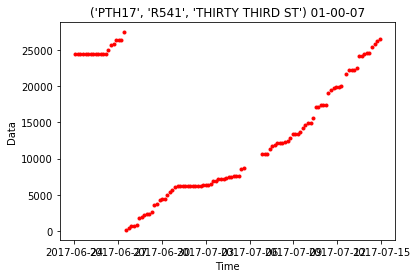

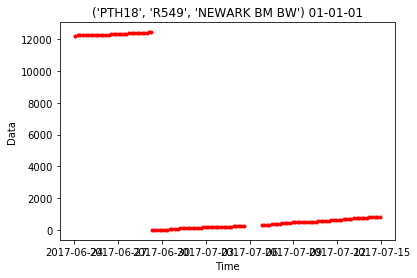

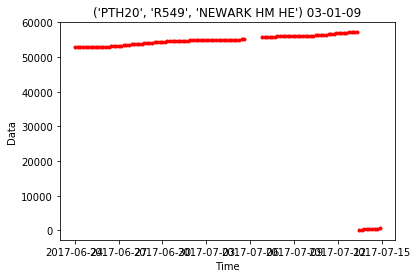

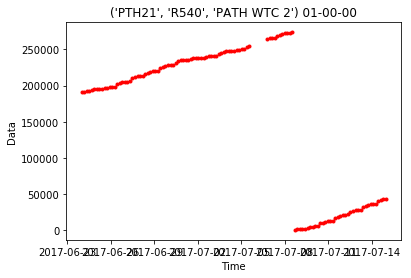

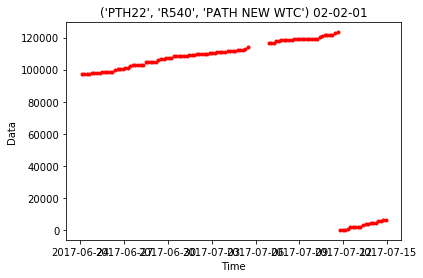

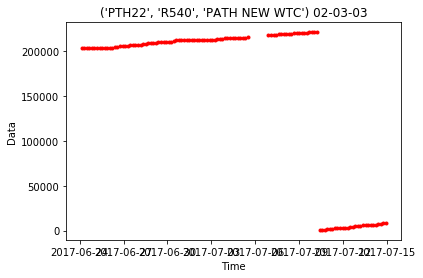

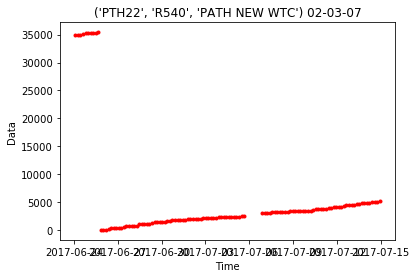

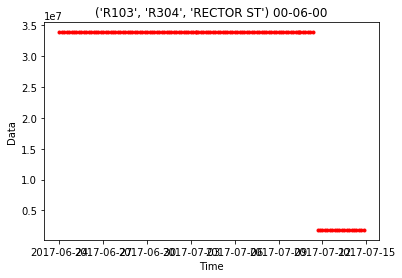

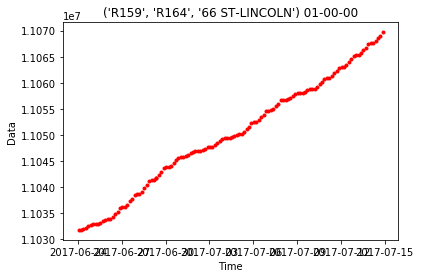

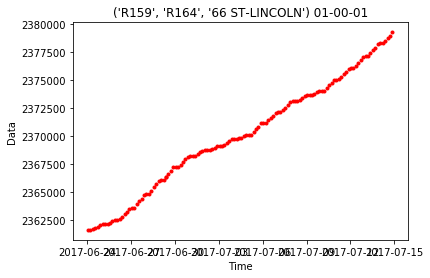

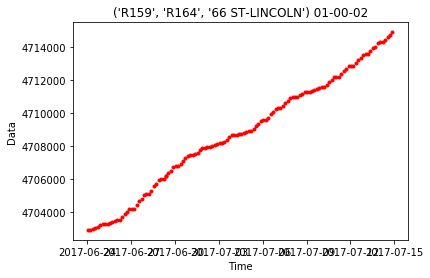

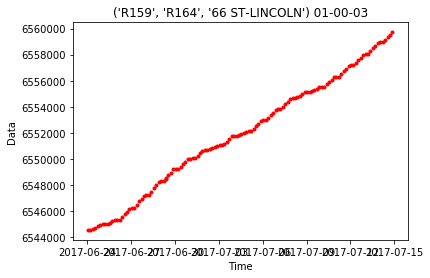

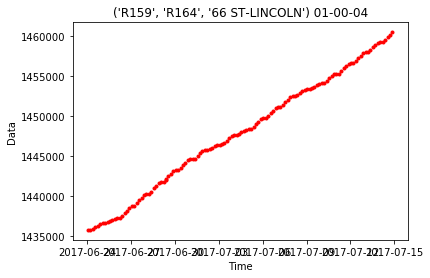

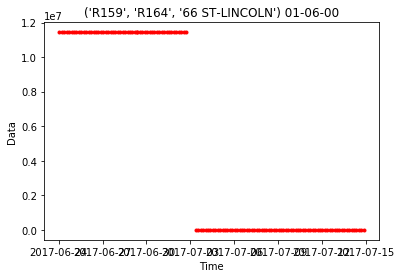

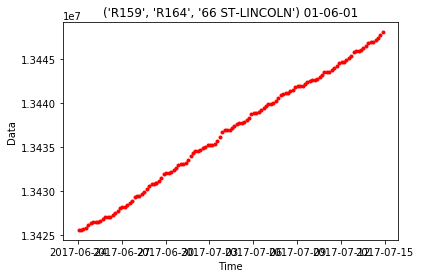

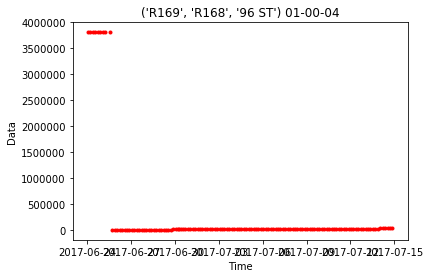

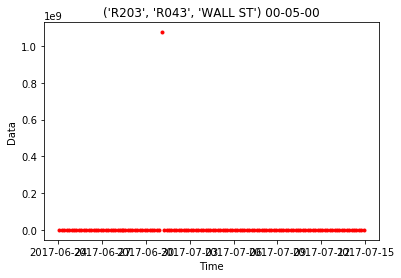

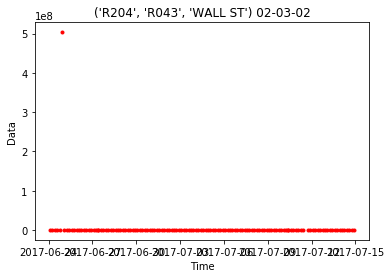

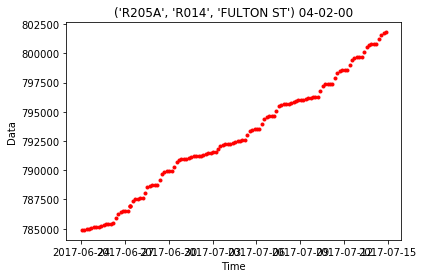

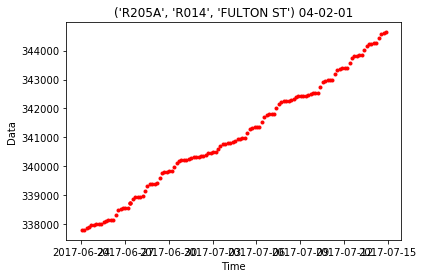

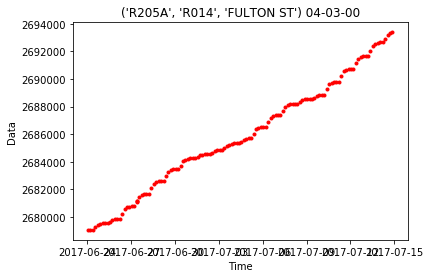

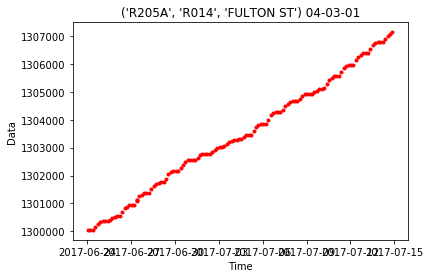

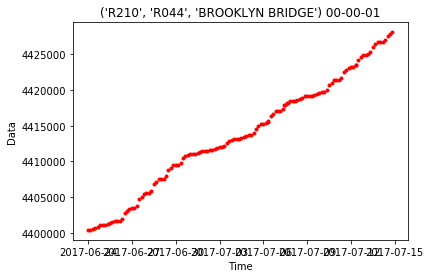

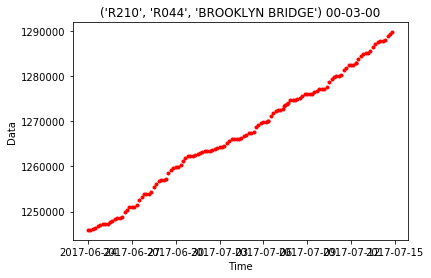

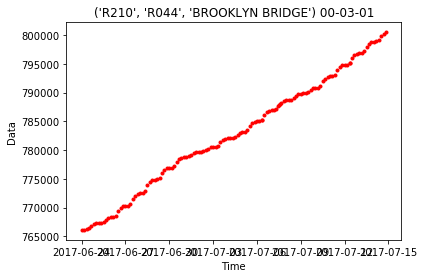

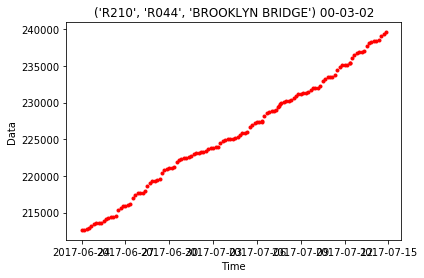

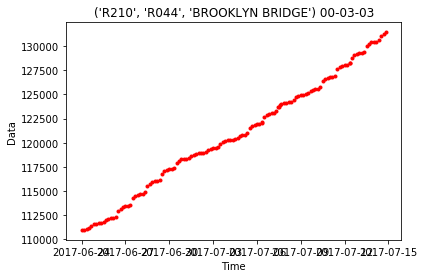

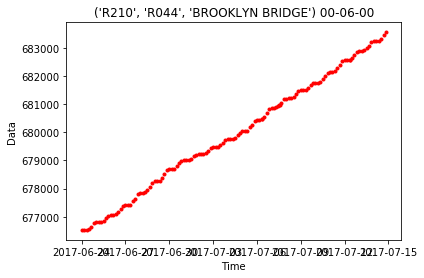

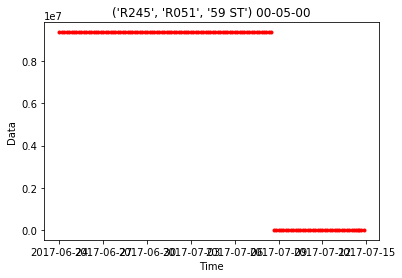

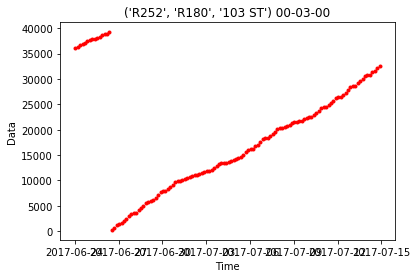

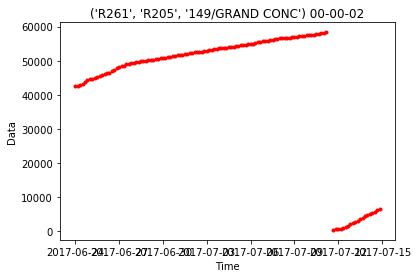

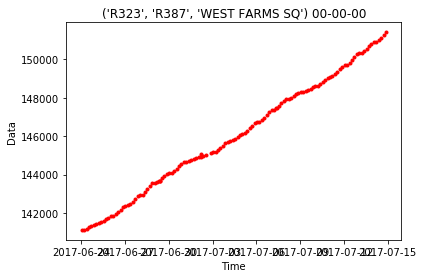

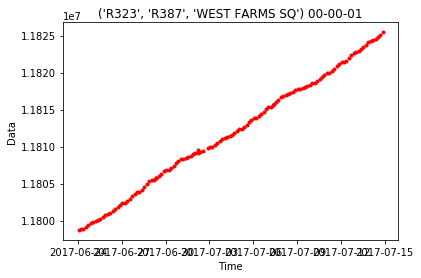

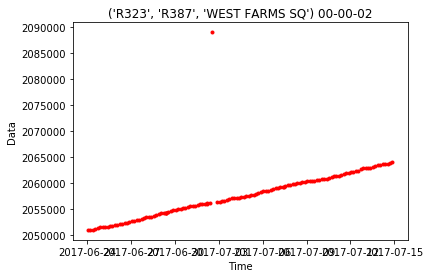

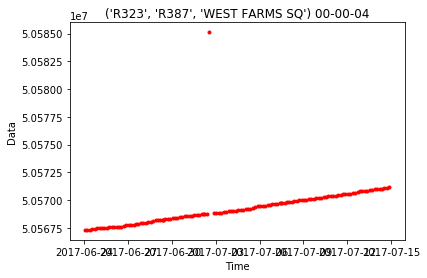

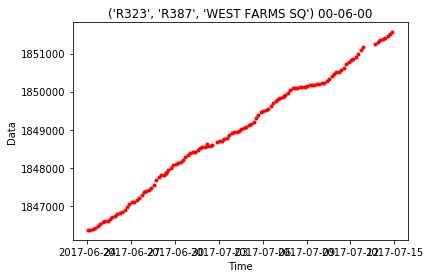

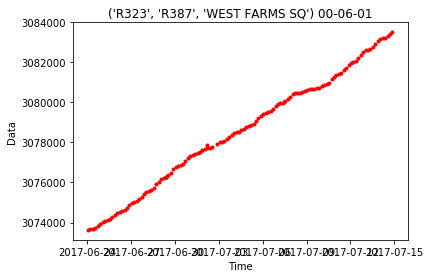

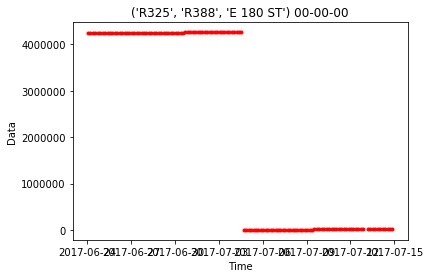

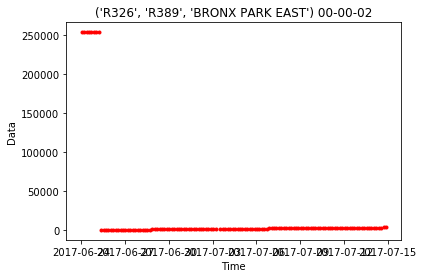

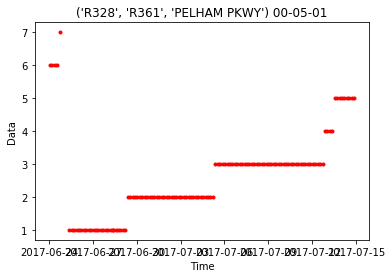

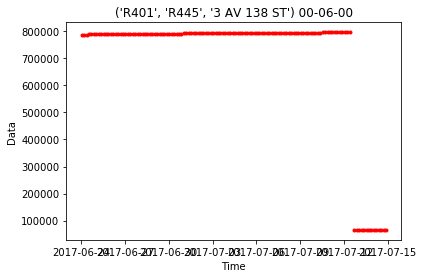

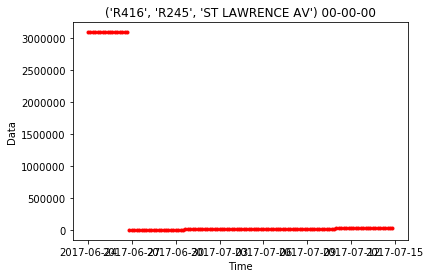

In [96]:
#All Trouble
print("All Trouble")
print("Total Trouble:",len(trouble))
for troubleStation in trouble.keys():
    inspection2(troubleStation)

### Specific Time Extraction Function
Input: List of a single **Turnstile**, Start Time, End Time

Output: **(Float)** Number of Riders for that day in that timeframe. **(Linear) Approximation** is used in case of incomplete information

In [94]:
from datetime import datetime as dt
def getRangeRider(turnstileList,startTime,endTime):
    ret = 0 #Return Value
    n = len(turnstileList)
    totalTime = endTime-startTime
    #print("Total Time:",totalTime) #Debugging Purpose
    for i in range(n-1): #A list of N items has (N-1) consecutive pairs
        ti = turnstileList[i][0]
        tf = turnstileList[i+1][0]
        if((tf<startTime) or (ti>endTime)):
            continue #Non-overlap Time Segment
        #Overlapping Time
        segmentTime = min(tf,endTime) - max(ti,startTime)
        fullSegment = tf-ti
        weight = segmentTime/fullSegment
        peopleCount = turnstileList[i+1][1]-turnstileList[i][1]
        #print("Considering",ti,"to",tf,"Weight:",weight,"Riders:",peopleCount) #Debugging Purpose
        ret+= (weight)*peopleCount
    return ret

#Test
t1 = dt.strptime("2017-06-24 05:00:00","%Y-%m-%d %H:%M:%S")
t2 = dt.strptime("2017-06-24 09:00:00","%Y-%m-%d %H:%M:%S")

ans = getRangeRider(bigDict[('R204', 'R043', 'WALL ST')]["02-00-00"],t1,t2)
print(ans)

18.0


In [95]:
#This function take a dictionary of a station as a input, it will call getRangeRider for each turnstile
def getStationRangeRider(stationDict,startTime,endTime):
    print("Riders between",startTime,endTime)
    ret = 0
    for k,v in stationDict.items():
        
        cur = getRangeRider(v,startTime,endTime)
        ret+= cur
        print("Turnstile",k,":",cur)
    return ret

#Example Usage
ans = getStationRangeRider(bigDict[('R204', 'R043', 'WALL ST')],dt(2017,6,27,6,0,0),dt(2017,6,28,6,0,0))
print(ans)

Riders between 2017-06-27 06:00:00 2017-06-28 06:00:00
Turnstile 02-00-00 : 1439.0
Turnstile 02-00-01 : 1343.0
Turnstile 02-03-00 : 1976.0
Turnstile 02-03-01 : 755.0
Turnstile 02-03-02 : 632.0
Turnstile 02-03-03 : 798.0
Turnstile 02-05-00 : 1168.0
Turnstile 02-05-01 : 387.0
Turnstile 02-06-00 : 1195.0
Turnstile 02-06-01 : 141.0
9834.0
